In [51]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Load dataset
data = pd.read_csv('/content/machine failure.csv')

In [34]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [36]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [37]:
data.nunique()

,0
UDI,10000
Product ID,10000
Type,3
Air temperature [K],93
Process temperature [K],82
Rotational speed [rpm],941
Torque [Nm],577
Tool wear [min],246
Machine failure,2
TWF,2


In [38]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [39]:
data=data.drop(['Product ID'],axis=1)

In [40]:
# Encode categorical variables (if any)
#data = pd.get_dummies(data, drop_first=True)

In [41]:
data

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [42]:
num_features = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]',
                'Tool wear [min]','Machine failure','TWF','HDF','PWF','OSF','RNF']

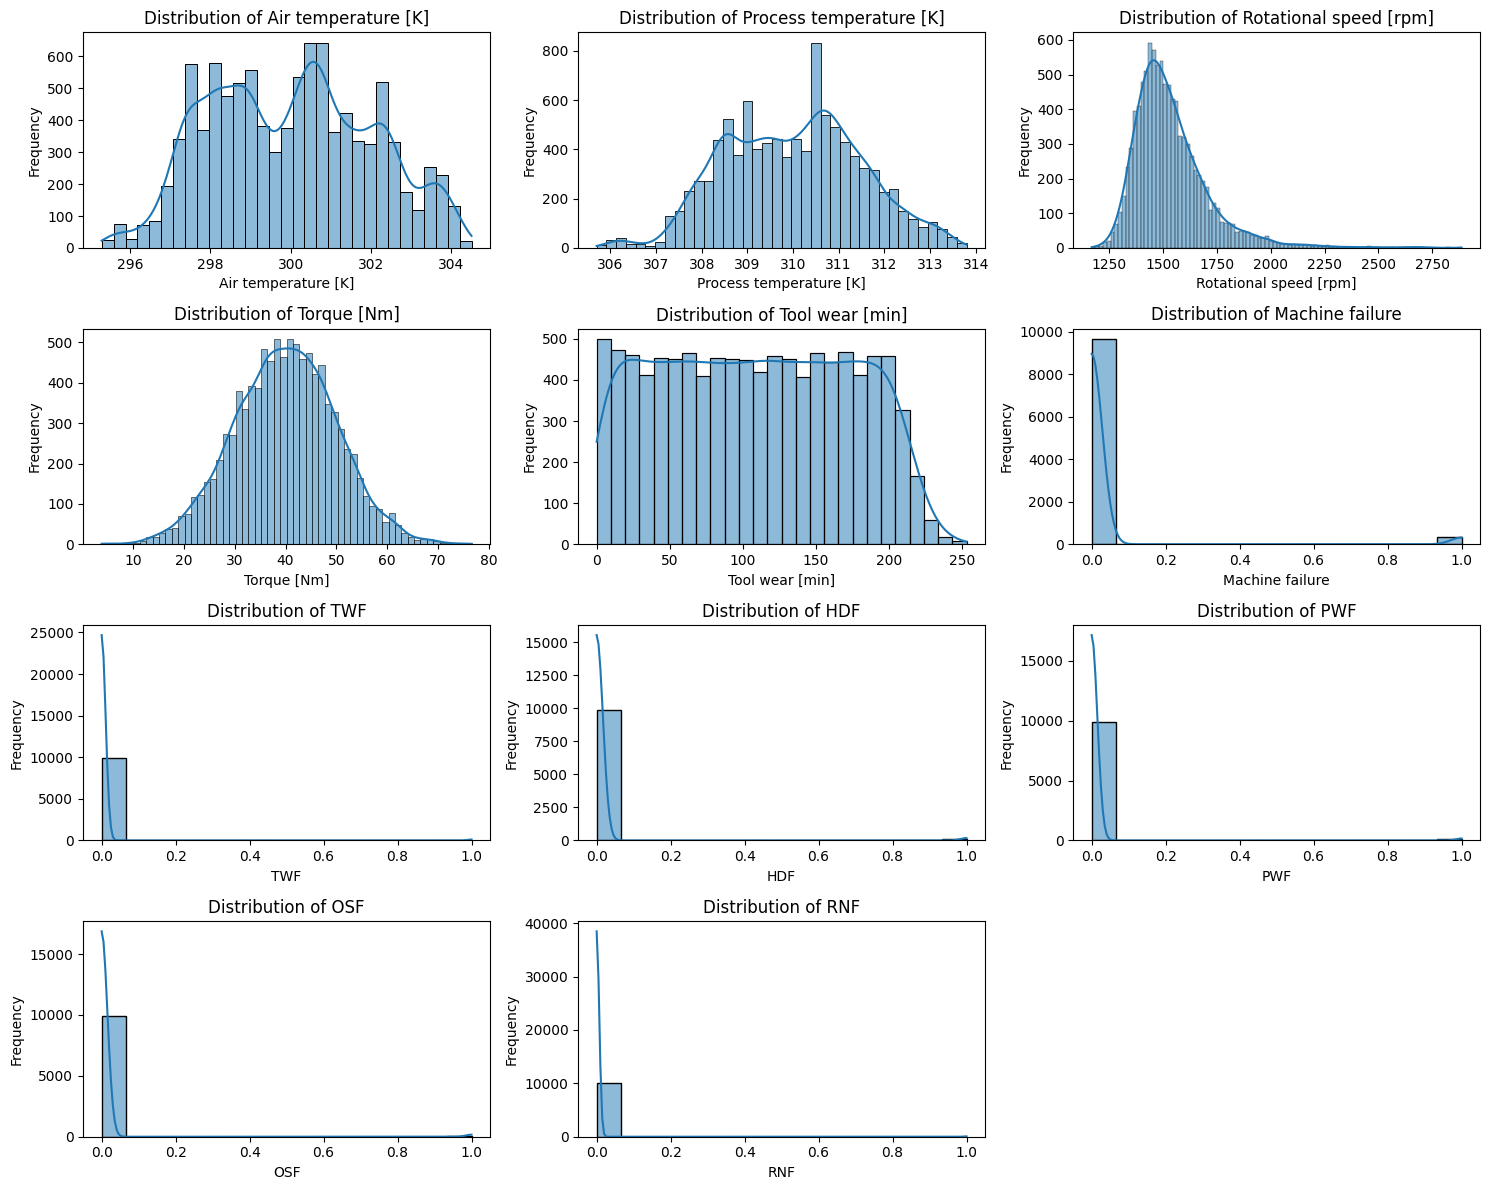

In [43]:
num_cols = 3  # Number of columns in the grid
num_rows = int(np.ceil(len(num_features) / num_cols))  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through features and plot
for i, feature in enumerate(num_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])  # Plot on the current subplot
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any empty subplots if there are fewer features than grid cells
for i in range(len(num_features), len(axes)):
    axes[i].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

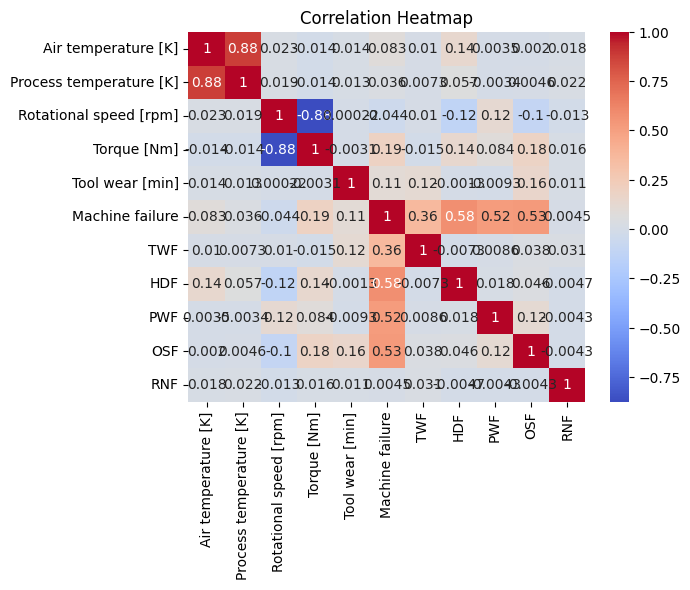

In [44]:
cor_matrix = data[num_features].corr()
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

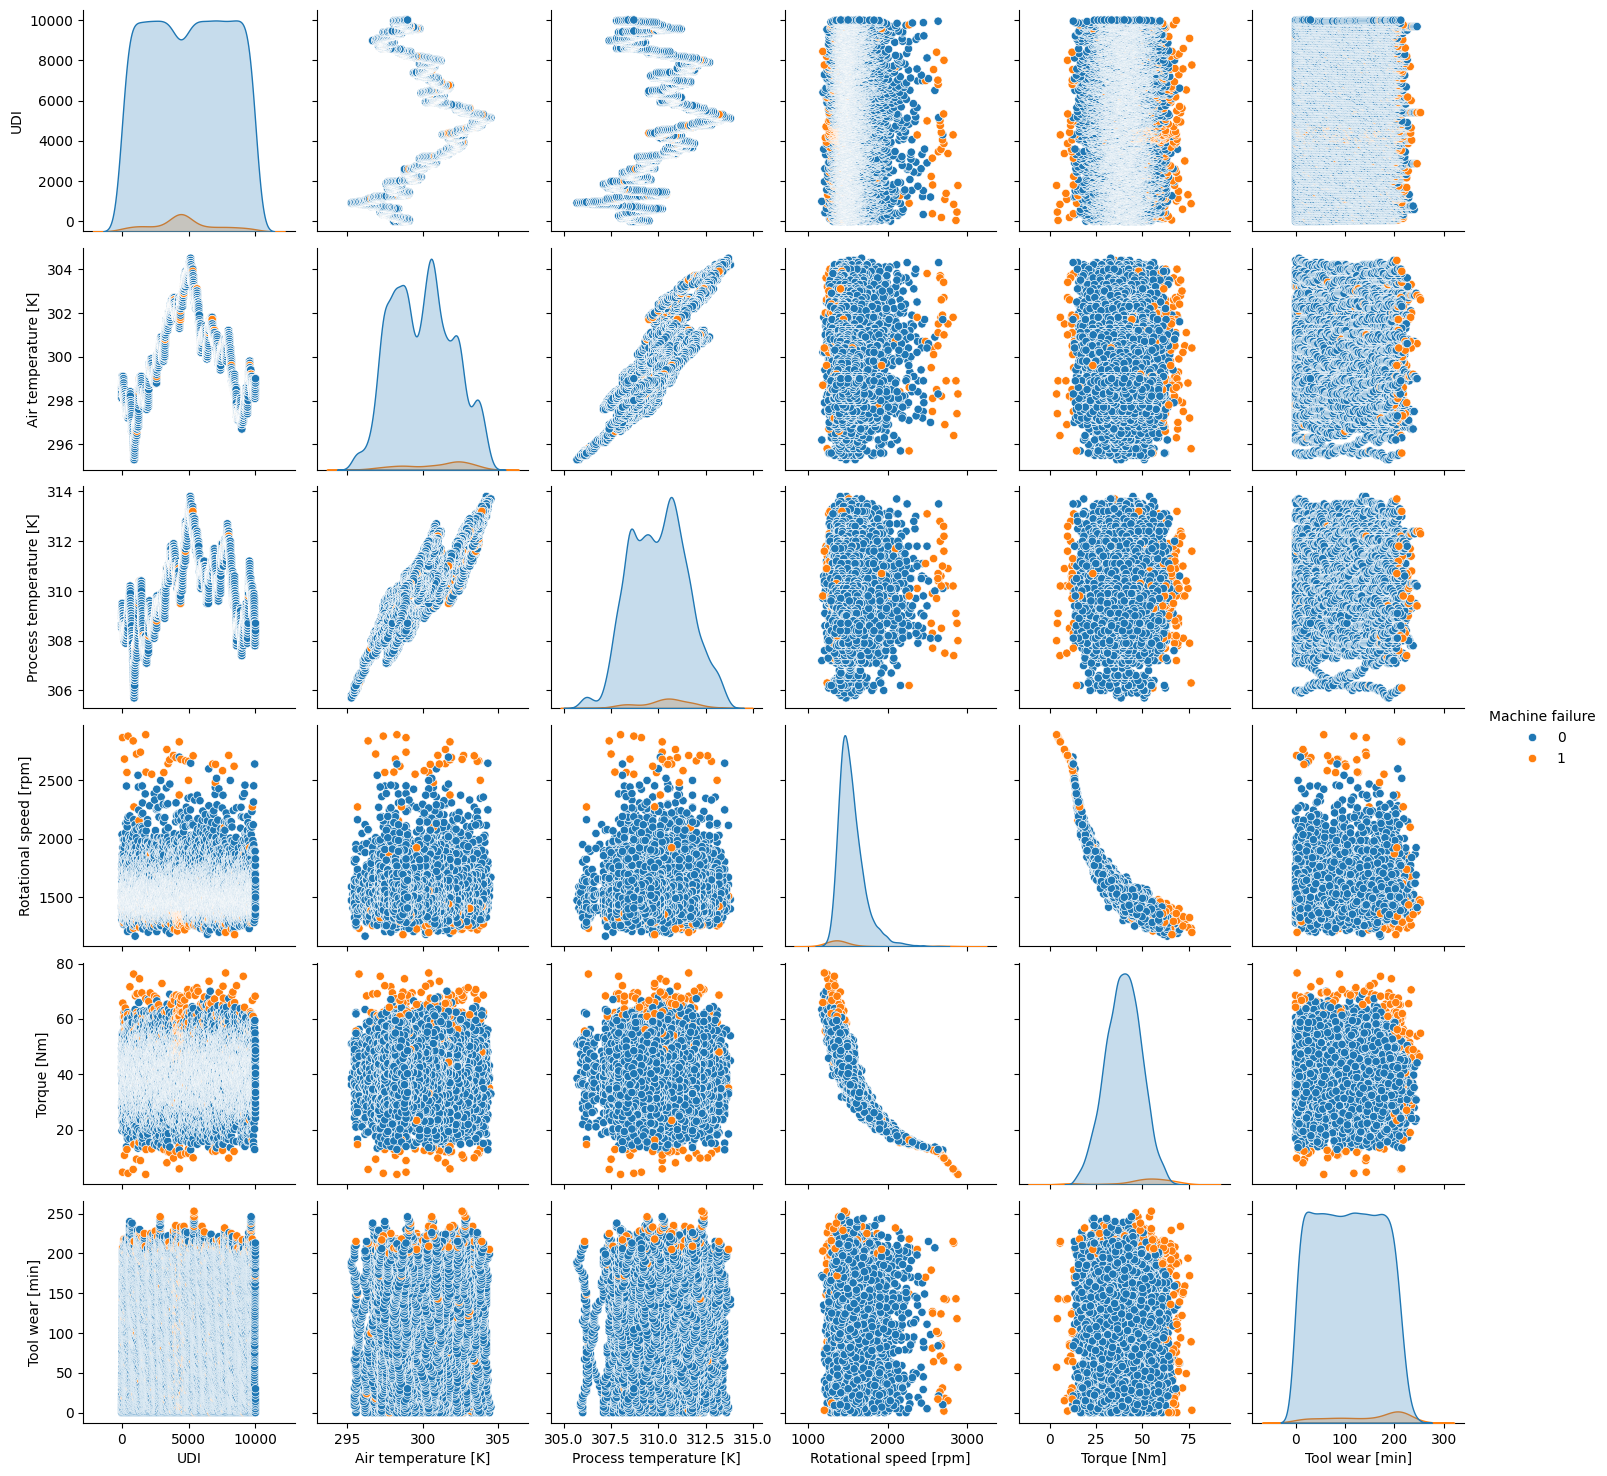

In [45]:
sns.pairplot(data.drop(['TWF','HDF','PWF','OSF','RNF'], axis=1),hue='Machine failure')

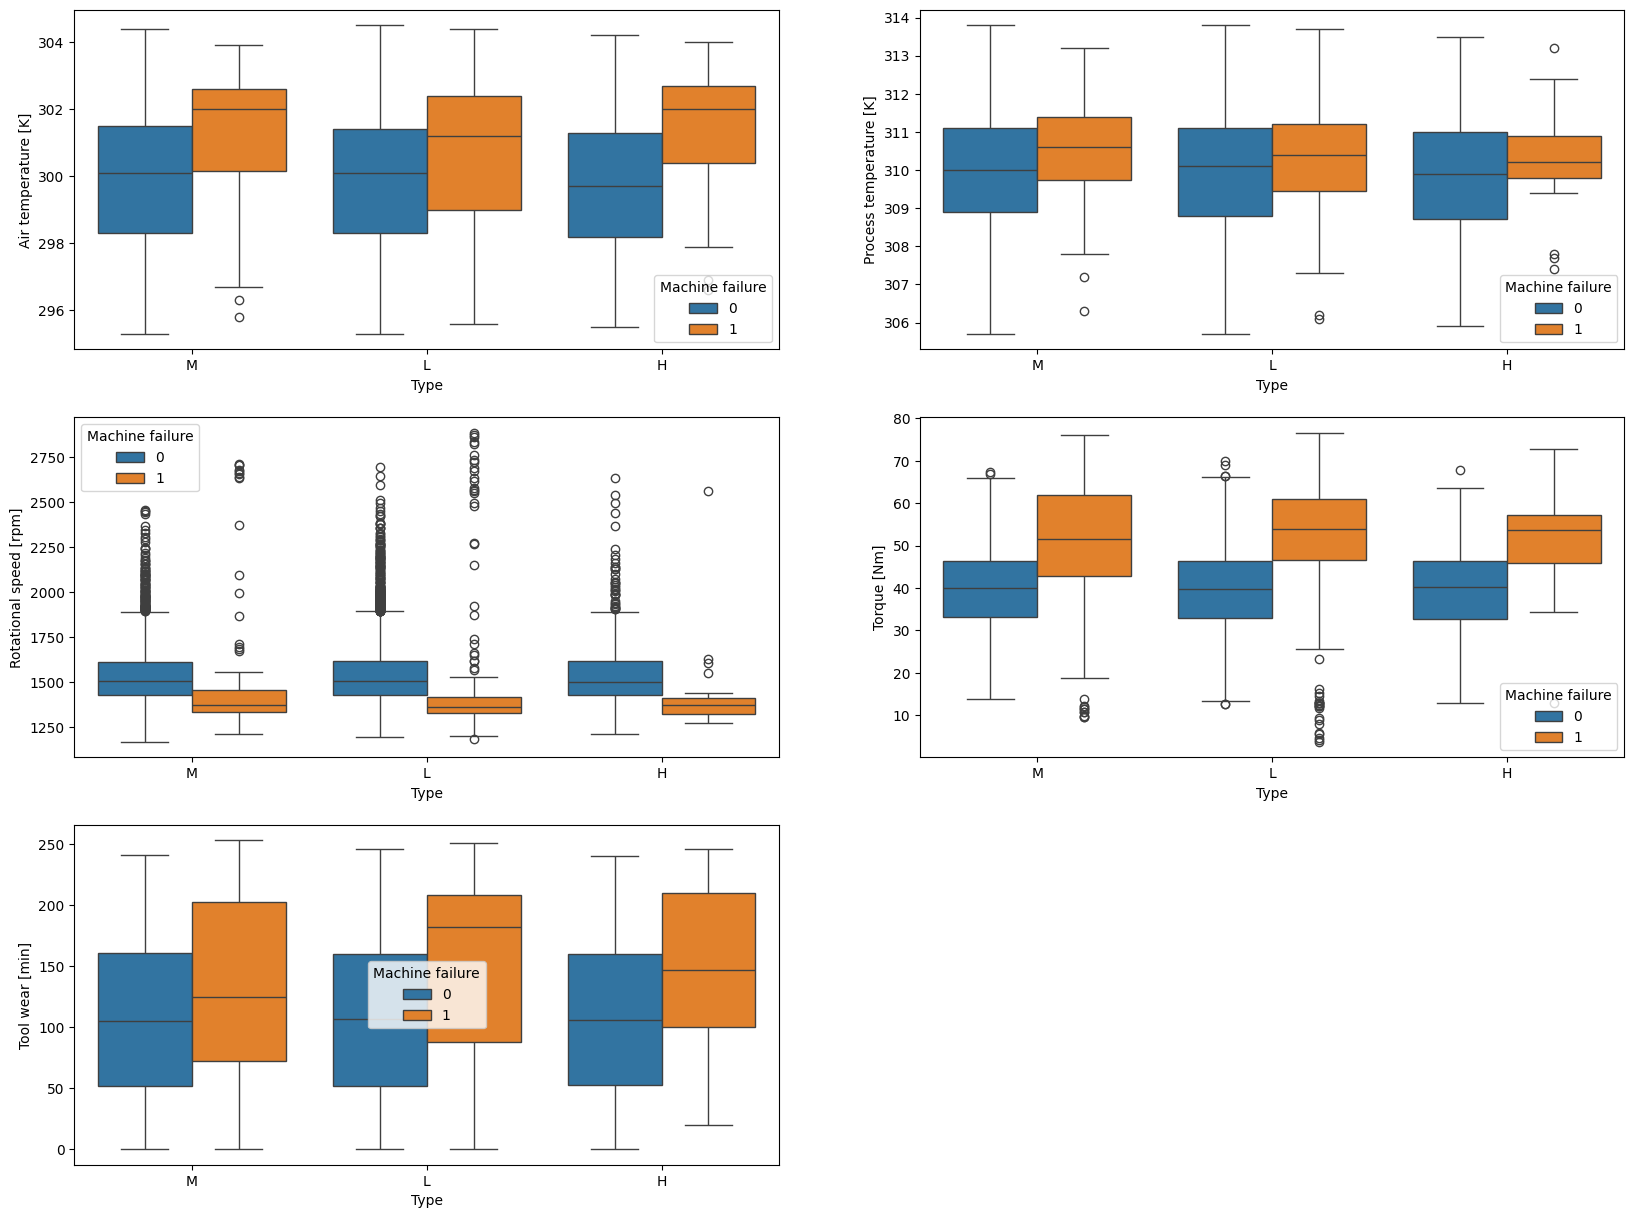

In [46]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=data, y = i, x="Type", hue="Machine failure")
    m+=1

In [49]:
def feat_prob(feature, data):
    x,y = [],[]
    for j in data[feature].unique():
        temp = data
        temp = temp[temp[feature]>=j]
        y.append(round((temp['Machine failure'].mean()*100),2))
        x.append(j)
    return(x,y)

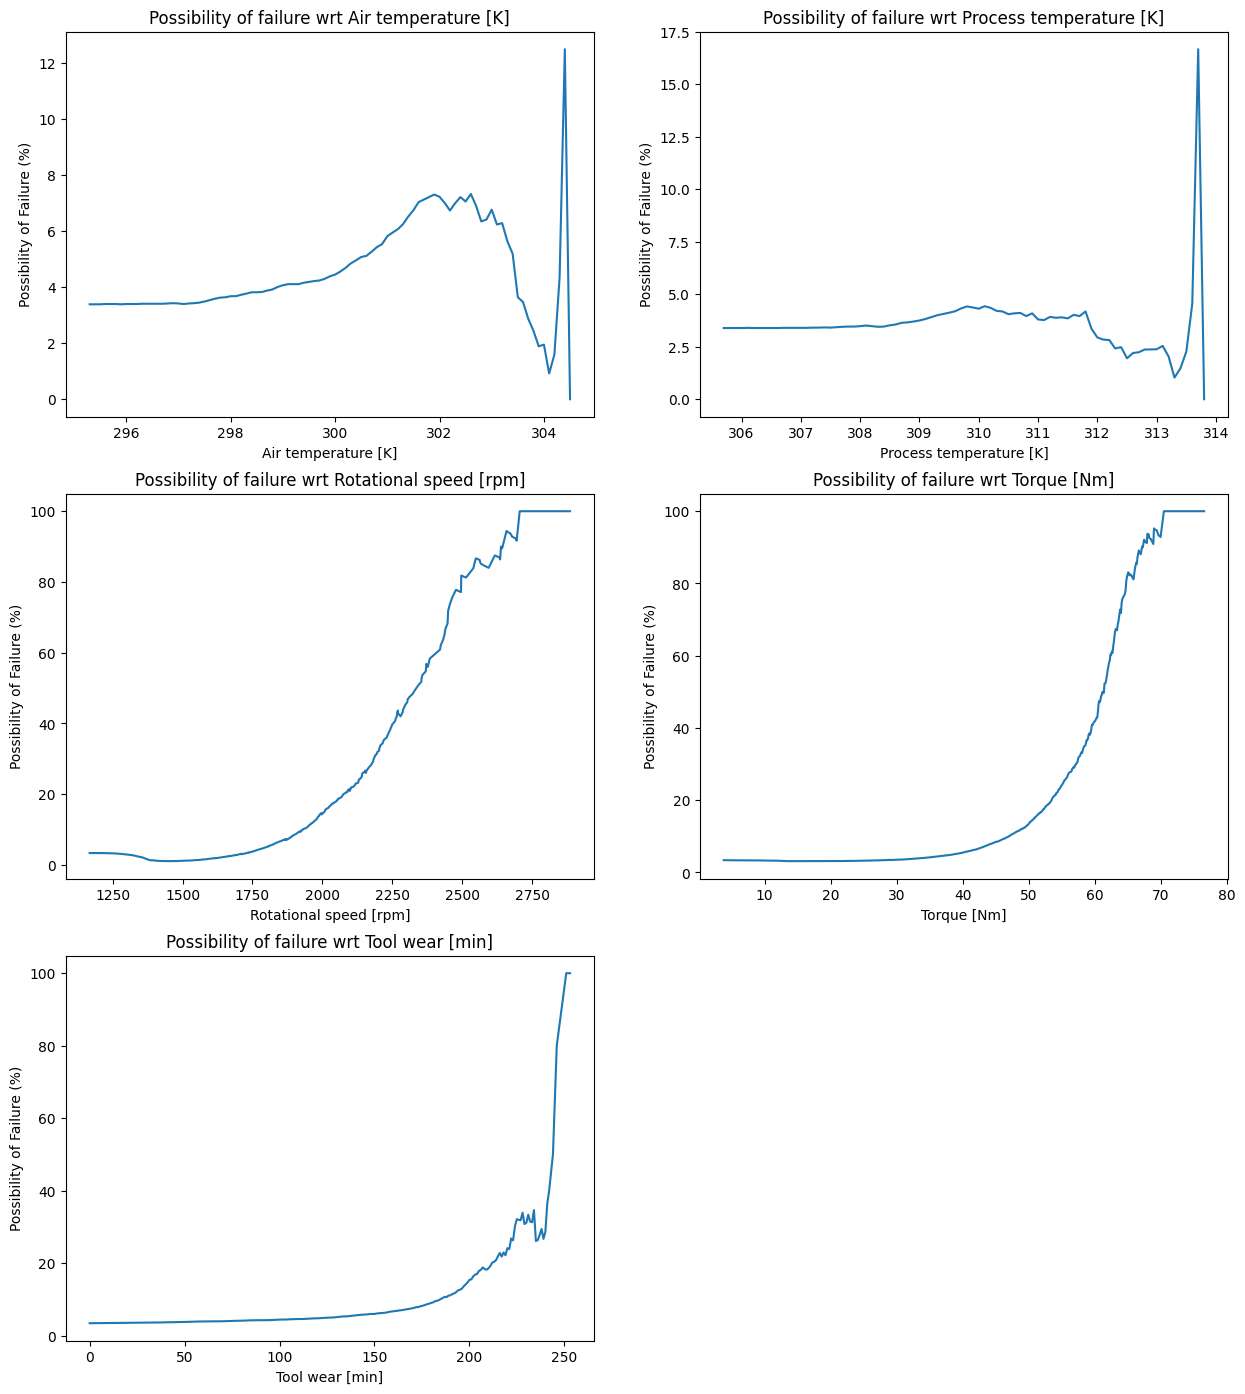

In [50]:
plt.figure(figsize=(15,17))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m).set_title(label=("Possibility of failure wrt "+i))

    x,y = feat_prob(i,data)  #function call
    plt.xlabel(i)

    plt.ylabel("Possibility of Failure (%)")
    sns.lineplot(y=y,x=x)
    m+=1

In [53]:
label_encoder = LabelEncoder()

label_encoder.fit(data['Type'])
data['Type'] = label_encoder.transform(data['Type'])

label_encoder.fit(data['Machine failure'])
data['machine failure'] = label_encoder.transform(data['Machine failure'])

In [54]:
# Define features (X) and target (y)
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Make predictions
y_pred = model.predict(X_test)

In [58]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1939    0]
 [   0   61]]


In [59]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      1.00      1.00        61

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [60]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
1.0


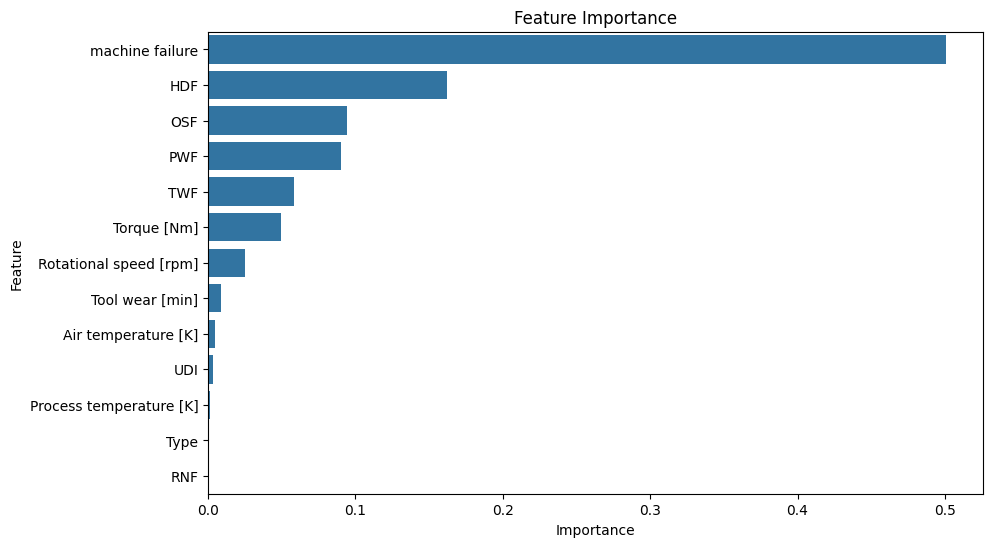

In [61]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [62]:

# # Save the model
# import joblib
# joblib.dump(model, 'failure_prediction_model.pkl')

# # Load the model
# loaded_model = joblib.load('failure_prediction_model.pkl')
# new_predictions = loaded_model.predict(X_test)
